<hr style = "height:6px;border:none;background-color:sienna">

<h2 style = "font-weight:bold;font-style:italic">
    Getdata_JHTDB_2 demo notebook
</h2>

<p style = "font-weight:bold;font-size:13px">
    &emsp;- stable release version 2.1.1 (18 January 2024)
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> :
    <br>
    &emsp;- SciServer processing of JHTDB datasets.
    <br><br>
    <u>supported datasets</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024coarse &ensp;: &ensp;isotropic 1024-cube (coarse).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024fine &ensp;: &ensp;isotropic 1024-cube (fine).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic4096 &ensp;: &ensp;isotropic 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic8192 &ensp;: &ensp;isotropic 8192-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048low &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, low-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048high &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, high-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        rotstrat4096 &ensp;: &ensp;rotating stratified 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mhd1024 &ensp;: &ensp;magneto-hydrodynamic isotropic 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mixing &ensp;: &ensp;homogeneous buoyancy driven 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel &ensp;: &ensp;channel flow.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel5200 &ensp;: &ensp;channel flow (reynolds number 5200).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        transition_bl &ensp;: &ensp;transitional boundary layer.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>functions</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        getCutout &ensp;: &ensp;read data for a user-specified box.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        getData &ensp;: &ensp;retrieve (interpolate and/or differentiate) a group of sparse data points for the specified variable.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        write_cutout_hdf5_and_xmf_files &ensp;: &ensp;write getCutout results to .h5 and .xmf files.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        write_interpolation_tsv_file &ensp;: &ensp;write getVariable results to a .tsv file.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        cutoutValues &ensp;: &ensp;see values for specific point(s) in the getCutout data.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        contourPlot &ensp;: &ensp;create a contour plot of getCutout data.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    instantiate dataset
</h4>

<p style = "font-weight:bold;font-size:13px">
    &emsp;n.b. &ensp;: &ensp;the metadata is stored in pickle files in the "pickled" folder. if processing fails, delete the 
    pickle files and try again.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- instantiate the dataset and cache the metadata.
    <br>

</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        auth_token &ensp;: &ensp;turbulence user authorization token.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        dataset_title &ensp;: &ensp;name of the turbulence dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_path &ensp;: &ensp;folder path in the "scratch" folder of the "Temporary" directory of the user's SciServer container.
        <br>
        &emsp;- default (if left blank) &ensp;: &ensp;/home/idies/workspace/Temporary/USERNAME/scratch/turbulence_output
        <br>
        &emsp;- output files will be saved in this folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [1]:
"""
instantiate dataset
"""
from giverny.isotropic_cube import *

"""
user-defined parameters.
"""
auth_token = 'edu.jhu.pha.turbulence.testing-201406'

dataset_title = 'sabl2048low'

output_path = ''

# instantiate the dataset.
dataset = iso_cube(dataset_title = dataset_title, output_path = output_path, auth_token = auth_token)

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    getData
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve (interpolate and/or differentiate) a group of sparse data points.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>steps</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        step 1 &ensp;: &ensp;identify the database files to be read.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        step 2 &ensp;: &ensp;read the database files and store the interpolated points in an array.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
         dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        points &ensp;: &ensp;array of points in the domain [0, 2pi).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        variable &ensp;: &ensp;type of data (velocity, pressure, energy, temperature, force, magneticfield, vectorpotential, density, position).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        timepoint &ensp;: &ensp;time point.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        timepoint_end &ensp;: &ensp;ending time point for 'position' variable.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        delta_t &ensp;: &ensp;time step for 'position' variable.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        temporal_method &ensp;: &ensp;temporal interpolation methods.
        <br>
        &emsp;- none &ensp;: &ensp;No temporal interpolation (the value at the closest stored time will be returned).
        <br>
        &emsp;- pchip &ensp;: &ensp;Piecewise Cubic Hermite Interpolation Polynomial method is used, in which the value from the two nearest time points<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;is interpolated at time t using Cubic Hermite Interpolation Polynomial, with centered finite difference evaluation of the<br>
        &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;end-point time derivatives (i.e. a total of four temporal points are used).
        <br>
    </li>
    <li style = "font-weight:bold;font-size:13px">
        spatial_method &ensp;: &ensp;spatial interpolation and differentiation methods.
        <br>
        &emsp;- none &ensp;: &ensp;No spatial interpolation (value at the datapoint closest to each coordinate value).
        <br>
        &emsp;- lag4 &ensp;: &ensp;4th-order Lagrange Polynomial interpolation along each spatial direction.
        <br>
        &emsp;- lag6 &ensp;: &ensp;6th-order Lagrange Polynomial interpolation along each spatial direction.
        <br>
        &emsp;- lag8 &ensp;: &ensp;8th-order Lagrange Polynomial interpolation along each spatial direction.
        <br>
        &emsp;- m1q4 &ensp;: &ensp;Splines with smoothness 1 (3rd order) over 4 data points.
        <br>
        &emsp;- m2q8 &ensp;: &ensp;Splines with smoothness 2 (5th order) over 8 data points. 
        <br>
        &emsp;- fd4noint &ensp;: &ensp;4th-order centered finite differencing (without spatial interpolation).
        <br>
        &emsp;- fd6noint &ensp;: &ensp;6th-order centered finite differencing (without spatial interpolation).
        <br>
        &emsp;- fd8noint &ensp;: &ensp;8th-order centered finite differencing (without spatial interpolation).
        <br>
        &emsp;- fd4lag4 &ensp;: &ensp;4th-order Lagrange Polynomial interpolation in each direction, of the 4th-order finite difference values on the grid.
        <br>
    </li>
    <li style = "font-weight:bold;font-size:13px">
        spatial_operator &ensp;: &ensp;spatial interpolation and differentiation operator.
        <br>
        &emsp;- function &ensp;: &ensp;interpolation.
        <br>
        &emsp;- gradient &ensp;: &ensp;differentiation.
        <br>
        &emsp;- hessian &ensp;: &ensp;differentiation.
        <br>
        &emsp;- laplacian &ensp;: &ensp;differentiation.
        <br>
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        result &ensp;: &ensp;interpolated/differentiated values array.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [2]:
"""
process getVariable data
"""
from giverny.turbulence_toolkit import *

"""
user-defined parameters.
"""
variable = 'velocity'
timepoint = 1
temporal_method = 'none'
spatial_method = 'lag4'
spatial_operator = 'function'

# 'position' variable parameters. 'option' is a list of these parameters for passing into the getData function.
timepoint_end = 1.24
delta_t = 0.12

option = [timepoint_end, delta_t]

"""
example point distributions (2D plane, 3D box, random, single point):
-
2D plane demo points : evenly spaced over a 2D plane lying along one of the primary axes.
    - n_points : number of points along each axis. total number of points queried will be n_points^2.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 2D plane.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
# n_points = 64

# x_points = np.linspace(5 * np.pi, 8 * np.pi, n_points)
# y_points = 0.5
# z_points = np.linspace(0.0, 3 * np.pi, n_points)

# points = np.zeros((n_points**2, 3), dtype = np.float32)

# for i in range(n_points):
#     for j in range(n_points):      
#         points[i * n_points + j, 0] = x_points[i]  
#         points[i * n_points + j, 1] = y_points
#         points[i * n_points + j, 2] = z_points[j]

"""
3D box demo points : evenly spaced over a 3D volume.
    - n_points : number of points along each axis. total number of points queried will be n_points^3.
    - x_points, y_points, z_points : point distributions along each axis, evenly spaced over the specified ranges.
        - np.linspace(axis minimum, axis maximum, number of points).
    - points : the points array evenly spaced out over the 3D volume.
        - points array is instantiated as an empty array that will be filled inside the for loops.
"""
# n_points = 32

# x_points = np.linspace(0.2, 3.85, n_points)
# y_points = np.linspace(1.346, 1.524, n_points)
# z_points = np.linspace(0.0013, 1.56, n_points)

# points = np.zeros((n_points**3, 3), dtype = np.float32)

# for i in range(n_points):
#     for j in range(n_points):
#         for k in range(n_points):      
#             points[i * n_points**2 + j * n_points + k, 0] = x_points[i]  
#             points[i * n_points**2 + j * n_points + k, 1] = y_points[j]
#             points[i * n_points**2 + j * n_points + k, 2] = z_points[k]

"""
random box demo points : uniformly distributed over the specified domain.
    - n_points : number of points.
    - min_xyz, max_xyz : minimum and maximum (x, y, z) axes boundaries for generating the random distribution of points within.
    - points : the points array containing a random distribution of points in the specified domain.
"""
# n_points = 100

# min_xyz = [0.0061359, 0.0061359, 0.0061359]
# max_xyz = [0.38656, 0.38656, 0.38656]

# points = np.random.uniform(low = [min_xyz[0], min_xyz[1], min_xyz[2]],
#                            high = [max_xyz[0], max_xyz[1], max_xyz[2]] , size = (n_points, 3))

"""
single demo point.
    - points : the points array containing a single point.
"""
points = np.array([[0.0061359233, 0.0061359233, 0.0061359233]], dtype = np.float32)

"""
use the tools and processing gizmos.
"""
# process interpolation/differentiation of points.
result = getData(dataset, variable, timepoint, temporal_method, spatial_method, spatial_operator, points, option)

"""
display the results.
""";
# set threshold for the number of numpy array elements to display.
np.set_printoptions(threshold = 10)

print(f'num points = {len(result)}')

print(f'\npoints = \n-\n{points}')
print(f'\nresult = \n-\n{result}\n')

"""
for the 2D plane example, generate a 2D contour plot.
    - a simple plot to quickly visualize the queried 2D plane.
""";
# import matplotlib.pyplot as plt

# # user-defined plot parameters.
# # specify the number of dimensions in the data (e.g. 'velocity' has 3 dimensions [vector], 'pressure' has 1 dimension [scalar]).
# data_dimensions = 3
# # which dimension of the data to plot (0-based index, so the first dimension is specified as 0).
# plot_dimension = 1

# # reformat 'result' for plotting.
# result_array = np.array(result)
# data_plot = np.zeros((n_points, n_points, data_dimensions), dtype = np.float32)
# x_plot = np.zeros((n_points, n_points), dtype = np.float32)
# z_plot = np.zeros((n_points, n_points), dtype = np.float32)

# for i in range(n_points):
#     for j in range(n_points):
#         x_plot[i, j] = x_points[i]
#         z_plot[i, j] = z_points[j]
#         data_plot[i, j, :] = result_array[i * n_points + j, :]
        
# # plot the data.
# fig = plt.figure(figsize = (7, 7), dpi = 67)
# contour = plt.contourf(x_plot, z_plot, data_plot[:, :, plot_dimension], levels = 500)
# cbar = plt.colorbar(contour)
# cbar.ax.tick_params(labelsize = 14)
# plt.tick_params(axis = 'both', labelsize = 14)
# plt.tight_layout()
# plt.show()
# plt.close()


-------------------------
getData is processing...

Step 1: Sorting the points to native and visitor bucket maps...
-------------------------
len db_native_map = 
1
-
len db_visitor_map = 
0

Successfully completed.
-----

Step 2: Interpolating and differentiating...
-------------------------
Database files are being read sequentially...

Successfully completed.
-----

step 1 time elapsed = 0.001 seconds (0.000 minutes)
step 2 time elapsed = 1.497 seconds (0.025 minutes)

total time elapsed = 1.673 seconds (0.028 minutes)

Data processing pipeline has completed successfully.
-----
num points = 1

points = 
-
[[0.00613592 0.00613592 0.00613592]]

result = 
-
         ux        uy        uz
0 -7.433216  0.383495  0.186354



<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    save interpolation results
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- save the interpolated/differentiated points retrieved by the getData function.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
         dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         points &ensp;: &ensp;input points to getData.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getData.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the tsv file to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        tsv file &ensp;: &ensp;saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [ ]:
"""
write the interpolation results to a tab-separated value (tsv) file
"""
from giverny.turbulence_gizmos.basic_gizmos import *

"""
user-defined parameters.
"""
output_filename = 'turbulence-interpolation'

"""
use the tsv writing gizmo.
"""
# write the tsv output file.
write_interpolation_tsv_file(dataset, points, result, output_filename)

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    getCutout
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the user-requested box.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>steps</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        step 1 &ensp;: &ensp;identify the database files to be read.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        step 2 &ensp;: &ensp;read the database files and store the data in a matrix.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        x_range, y_range, z_range &ensp;: &ensp;axes ranges defining the box for which data values will be read.
        <br>
        &emsp;- specify each axis range as [minimum, maximum].
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        x_stride, y_stride, z_stride &ensp;: &ensp;axes strides, i.e. the number of points between each step along the axes.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        variable &ensp;: &ensp;type of data (velocity, pressure, energy, temperature, force, magneticfield, vectorpotential, density, position).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        timepoint &ensp;: &ensp;time point.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        cutout_data &ensp;: &ensp;matrix corresponding to variable at timepoint in axes_ranges with strides.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [3]:
"""
process getCutout data
"""
from giverny.turbulence_toolkit import *
from giverny.turbulence_gizmos.basic_gizmos import *

"""
user-defined parameters.
"""
x_range = [1, 15]
y_range = [1, 512]
z_range = [1, 512]

x_stride = 1
y_stride = 1
z_stride = 1

variable = 'velocity'
timepoint = 1

"""
use the tools and processing gizmos.
"""
# combine all of the axis data together for simplicity.
axes_ranges = assemble_axis_data([x_range, y_range, z_range])
strides = assemble_axis_data([x_stride, y_stride, z_stride])

# process a brick cutout.
cutout_data = getCutout(dataset, variable, timepoint, axes_ranges, strides)

Note: For larger boxes, e.g. 512-cubed and up, processing will take approximately 1 minute or more...
-----

Step 1: Determining which database files the user-specified box is found in...
-------------------------
number of database files that the user-specified box is found in:
1

number of hard disks that the database files are distributed on:
1

Successfully completed.
-----

Step 2: Reading the data from all of the database files and storing the values into a matrix...
-------------------------
Database files are being read sequentially...

Successfully completed.
-----

step 1 time elapsed = 0.006 seconds (0.000 minutes)
step 2 time elapsed = 2.569 seconds (0.043 minutes)
total time elapsed = 2.584 seconds (0.043 minutes)

Data processing pipeline has completed successfully.
-----


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    save cutout results
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- save the cutout retrieved by the getCutout function.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
         dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges &ensp;: &ensp;parameter used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         cutout_data &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the tsv file to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        hdf5, xmf files &ensp;: &ensp;saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [ ]:
"""
write the cutout results to HDF5 and XMF files
"""
from giverny.turbulence_gizmos.basic_gizmos import *

"""
user-defined parameters.
"""
output_filename = 'turbulence-cutout'

"""
use the hdf5 and xmf writing gizmo.
"""
# writes the output hdf5 and xmf files.
write_cutout_hdf5_and_xmf_files(dataset, cutout_data, axes_ranges, output_filename)

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    cutout values
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the data value(s) for a datapoint (x, y, z), or a range of datapoints, e.g. x = range(1, 5), in the getCutout data.
    <br>
    &emsp;- note: range(min, max) will retrieve data values for points "min" through ("max" - 1).
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         cutout_data &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x &ensp;: &ensp;x-axis datapoint(s).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y &ensp;: &ensp;y-axis datapoint(s).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z &ensp;: &ensp;z-axis datapoint(s).
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        cutout_value &ensp;: &ensp;data value(s) of the requested datapoint(s).
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [ ]:
"""
data values
"""
from giverny.turbulence_gizmos.basic_gizmos import *

"""
user-defined parameters.
"""
x = 4
y = 5
z = 8

"""
use the data values gizmo.
"""
cutout_value = cutoutValues(dataset, x, y, z, cutout_data, axes_ranges, strides)

cutout_value

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    contour plot
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- create a contour plot from the getCutout data.
    <br>
    &emsp;- note: one of the axis ranges should be a single point, e.g. z_plot_range = [3, 3], since the contour plot is 2-dimensional.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         cutout_data &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_plot_range &ensp;: &ensp;x-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y_plot_range &ensp;: &ensp;y-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z_plot_range &ensp;: &ensp;z-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         plot_ranges &ensp;: &ensp;combined array of x_plot_range, y_plot_range, and z_plot_range.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        value_index &ensp;: &ensp;the index of the values to plot.
        <br>
        &emsp;- 1 corresponds to the "ux" component of the velocity data or the scalar magnitude of the scalar data (e.g. pressure).
        <br>
        &emsp;- 2 corresponds to the "uy" component of the velocity data.
        <br>
        &emsp;- 3 corresponds to the "uz" component of the velocity data.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the contour plot to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        contour plot &ensp;: &ensp;displayed in the notebook and saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

Generating contour plot...
-----


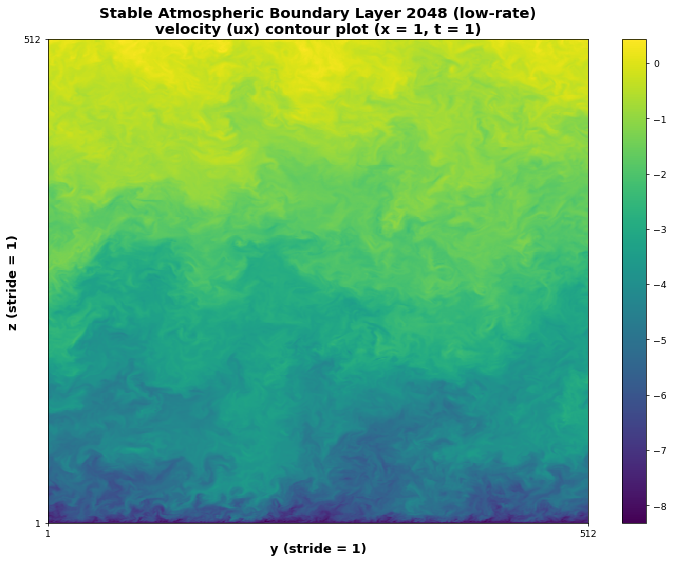

-----
Contour plot created successfully.


In [4]:
"""
contour plot
"""
from giverny.turbulence_gizmos.basic_gizmos import *

"""
user-defined parameters.
"""
x_plot_range = [1, 1]
y_plot_range = [1, 512]
z_plot_range = [1, 512]

value_index = 1

output_filename = 'turbulence-plane_contour_plot'

"""
use the tools and contour plot gizmo.
"""
# combine all of the plot axis ranges together for simplicity.
plot_ranges = assemble_axis_data([x_plot_range, y_plot_range, z_plot_range])

# create the contour plot.
contourPlot(dataset, value_index, cutout_data, plot_ranges, axes_ranges, strides, output_filename)